In [1]:
using Distributions, LinearAlgebra, AugmentedGaussianProcesses, Plots, Interact, DelimitedFiles
pyplot();

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/911d81a7cb859d03038a7d1d94989c1a91eb164c-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/911d81a7cb859d03038a7d1d94989c1a91eb164c-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
N_data = 500; N_test = 100
N_dim = 2; noise = 0.2
minx=-5.0
maxx=5.0
function latent(x)
    # return sin.(0.5*x[:,1].*x[:,2])
    return x[:,1].*sin.(x[:,2])
end
X = rand(N_data,N_dim)*(maxx-minx).+minx
x_test = range(minx,stop=maxx,length=N_test)
X_test = hcat([j for i in x_test, j in x_test][:],[i for i in x_test, j in x_test][:])
y = latent(X)+rand(Normal(0,noise),size(X,1))
y_test = latent(X_test)
kernel=RBFKernel(1.0);

10, 20, 

C:\Users\ASUS\.julia\conda\3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 

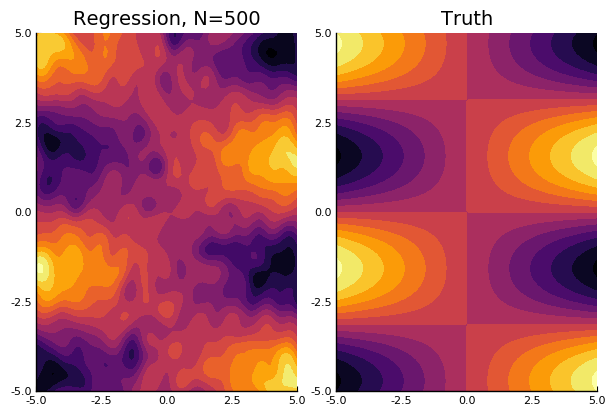

┌ Info: Saved animation to 
│   fn = C:\Users\ASUS\Documents\Experiments_AugmentedGP\Workshop\presentation\tmp.gif
└ @ Plots C:\Users\ASUS\.julia\packages\Plots\cxnAH\src\animation.jl:90


Plots.AnimatedGif("C:\\Users\\ASUS\\Documents\\Experiments_AugmentedGP\\Workshop\\presentation\\tmp.gif")

In [3]:
anim = Animation()
for i in 10:10:N_data
    if i%10 == 0
        print(i,", ")
    end
    model = BatchGPRegression(X[1:i,:],y[1:i],kernel=kernel)
    model.train()
    y_pred = model.predict(X_test)
    p_exp = plot(x_test,x_test,reshape(y_pred,N_test,N_test),t=:contour,fill=true,cbar=false,clims=[-5,5],lab="",title="Regression, N=$i")
    p_true = plot(x_test,x_test,reshape(y_test,N_test,N_test),t=:contour,fill=true,cbar=false,clims=[-5,5],lab="",title="Truth")
    p_all = plot(p_exp,p_true)
    frame(anim,p_all)
end
gif(anim)

In [4]:
gif(anim,fps=30)

┌ Info: Saved animation to 
│   fn = C:\Users\ASUS\Documents\Experiments_AugmentedGP\Workshop\presentation\tmp.gif
└ @ Plots C:\Users\ASUS\.julia\packages\Plots\cxnAH\src\animation.jl:90


Plots.AnimatedGif("C:\\Users\\ASUS\\Documents\\Experiments_AugmentedGP\\Workshop\\presentation\\tmp.gif")

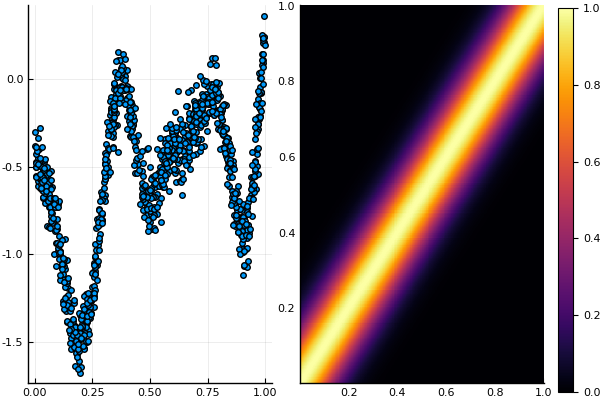

In [5]:
N = 1000
x = rand(N)
x_ord = sortperm(x)
k = RBFKernel(0.1,variance=1.0)
K = kernelmatrix(x,k) + 1e-9*I
y_clean = rand(MvNormal(zeros(N),K))
y = y_clean .+ rand(Normal(0,0.1),N)
plot(scatter(x,y,lab=""),heatmap(x[x_ord],x[x_ord],K[x_ord,x_ord]))

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
10), Observable{Int64} with 2 listeners. Value:
10, Scope("knockout-component-3e6b77da-f586-4e4d-b443-35e9da69d653", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>20,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\ASUS\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\ASUS\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\ASUS\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\ASUS\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\ASUS\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":10}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-3e6b77da-f586-4e4d-b443-35e9da69d653\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-3e6b77da-f586-4e4d-b443-35e9da69d653\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]
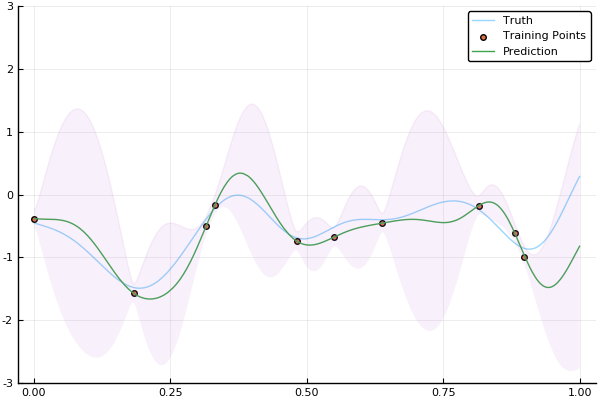
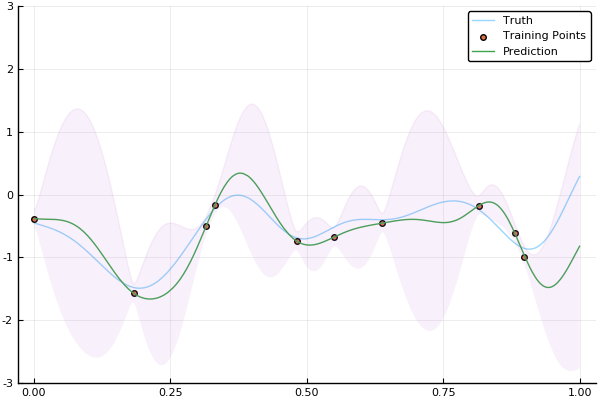

In [6]:
@manipulate for i in 1:20
    model = BatchGPRegression(x[1:i],y[1:i],kernel=k)
    model.train()
    y_pred, sig_pred = model.predictproba(x)
    p = plot(x[x_ord],y_clean[x_ord],lab="Truth",alpha=0.4,ylim=(-3,3),legend=:topright);
    scatter!(x[1:i],y[1:i],lab="Training Points");
    plot!(x[x_ord],y_pred[x_ord],lab="Prediction")
    plot!(x[x_ord],y_pred[x_ord]+2*sqrt.(sig_pred[x_ord]),fillrange=y_pred[x_ord]-2*sqrt.(sig_pred[x_ord]),alpha=0.1,lab="")
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
260), Observable{Int64} with 2 listeners. Value:
260, Scope("knockout-component-1eaa74c7-3104-4d02-aeaa-b68c9707dc86", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>500,:min=>30,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>10,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
260, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\ASUS\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\ASUS\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\ASUS\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\ASUS\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\ASUS\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":260}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-1eaa74c7-3104-4d02-aeaa-b68c9707dc86\",\"id\":\"ob_07\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-1eaa74c7-3104-4d02-aeaa-b68c9707dc86\",\"id\":\"ob_06\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"v
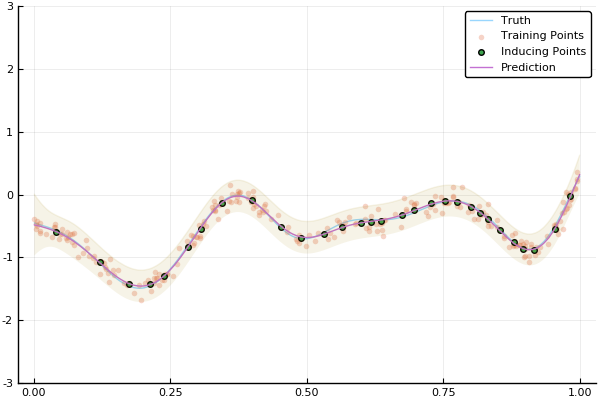
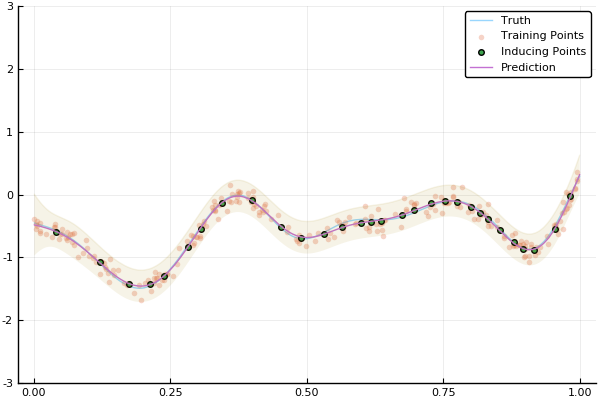

In [7]:
@manipulate for i in 30:10:500
    model = SparseGPRegression(x[1:i],y[1:i],kernel=k,m=min(30,i-1))
    model.train()
    y_pred, sig_pred = model.predictproba(x)
    p = plot(x[x_ord],y_clean[x_ord],lab="Truth",alpha=0.4,ylim=(-3,3),legend=:topright)
    scatter!(x[1:i],y[1:i],lab="Training Points",alpha=0.3,markerstrokewidth=0.0)
    scatter!(model.inducingPoints,model.μ,lab="Inducing Points",alpha=1)
    plot!(x[x_ord],y_pred[x_ord],lab="Prediction")
    plot!(x[x_ord],y_pred[x_ord]+2*sqrt.(sig_pred[x_ord]),fillrange=y_pred[x_ord]-2*sqrt.(sig_pred[x_ord]),alpha=0.1,lab="")
end

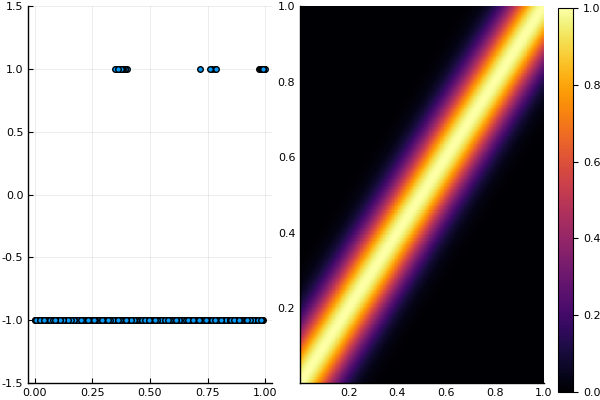

In [8]:
y_c = sign.(y)
y_cclean = sign.(y_clean)
plot(scatter(x,y_c,lab="",ylim=(-1.5,1.5)),heatmap(x[x_ord],x[x_ord],K[x_ord,x_ord]))

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
250), Observable{Int64} with 2 listeners. Value:
250, Scope("knockout-component-d388417b-3cc1-4fd0-ad40-14b645e5c1eb", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>500,:min=>10,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>10,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
250, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\ASUS\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\ASUS\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\ASUS\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\ASUS\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\ASUS\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":250}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-d388417b-3cc1-4fd0-ad40-14b645e5c1eb\",\"id\":\"ob_12\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-d388417b-3cc1-4fd0-ad40-14b645e5c1eb\",\"id\":\"ob_11\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"v
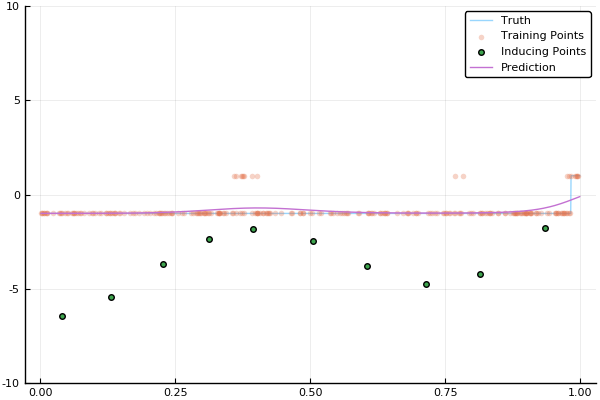
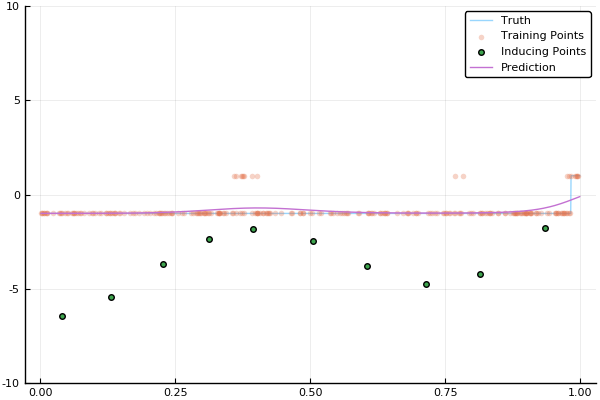

In [9]:
@manipulate for i in 10:10:500
    model = SparseXGPC(x[1:i],y_c[1:i],kernel=k,m=min(10,i-1),Autotuning=true)
    model.train()
    y_pred = model.predictproba(x)
    p = plot(x[x_ord],y_cclean[x_ord],lab="Truth",alpha=0.4,ylim=(-10,10),legend=:topright)
    scatter!(x[1:i],y_c[1:i],lab="Training Points",alpha=0.3,markerstrokewidth=0.0)
    scatter!(model.inducingPoints,model.μ,lab="Inducing Points",alpha=1)
    plot!(x[x_ord],(y_pred[x_ord].-0.5)*2,lab="Prediction")
end